In [2]:
import pandas as pd
running = pd.read_csv('C:/Users/himan/OneDrive/Documents/RedbackOperations/redback-fit-sports-performance/Running Analysis/activities.csv')


In [3]:
# Display the first few rows of the run activities DataFrame
print(running.head())

   Activity ID                Activity Name  Description  \
0   2284658991  Freiburg im Breisgau Laufen          NaN   
1   2284658936  Freiburg im Breisgau Laufen          NaN   
2   2228102647  Freiburg im Breisgau Laufen          NaN   
3   2104984694  Freiburg im Breisgau Laufen          NaN   
4   2084195352  Freiburg im Breisgau Laufen          NaN   

          Begin Timestamp  Begin Timestamp (Raw Milliseconds)  \
0   Sa, Nov 4, 2017 12:07                       1509793643000   
1    Fr, Nov 3, 2017 9:47                       1509698845000   
2  Mi, Okt 25, 2017 16:31                       1508941914000   
3  Fr, Okt 13, 2017 11:53                       1507888391000   
4   Mo, Okt 2, 2017 14:51                       1506948664000   

            End Timestamp  End Timestamp (Raw Milliseconds)  \
0   Sa, Nov 4, 2017 13:06                     1509797186000   
1   Fr, Nov 3, 2017 10:35                     1509701727000   
2  Mi, Okt 25, 2017 17:11                     1508944273000

In [4]:
# Print dimensions of running data before removing null values
print("Dimensions of running data before removing null values:", running.shape)

Dimensions of running data before removing null values: (155, 47)


In [5]:
# Check for null values in each column
null_counts = running.isnull().sum()

# Display the count of null values in each column
print(null_counts)

Activity ID                                0
Activity Name                              0
Description                              155
Begin Timestamp                            0
Begin Timestamp (Raw Milliseconds)         0
End Timestamp                              0
End Timestamp (Raw Milliseconds)           0
Device                                     0
Activity Parent                            0
Activity Type                              0
Event Type                                 0
Activity Time Zone                         0
Max. Elevation                             0
Max. Elevation (Raw)                       0
Begin Latitude (Decimal Degrees Raw)     116
Begin Longitude (Decimal Degrees Raw)    116
End Latitude (Decimal Degrees Raw)       116
End Longitude (Decimal Degrees Raw)      116
Average Moving Speed                       0
Average Moving Speed (Raw)                 0
Max. Heart Rate (bpm)                     64
Average Heart Rate (bpm)                  64
Max. Speed

In [6]:
import pandas as pd
from sklearn.impute import SimpleImputer
df = pd.DataFrame(running)

# Drop columns with all missing values
non_null_columns = df.columns[df.notna().any()].tolist()
df_non_null = df[non_null_columns]

imputer = SimpleImputer(strategy='most_frequent')  
running_imputed = imputer.fit_transform(running)

In [7]:
# Convert the NumPy array back to a DataFrame
running_imputed = pd.DataFrame(running_imputed, columns=non_null_columns)

# Check for null values in the filtered DataFrame
null_counts_filtered = running_imputed.isnull().sum()

# Display the count of null values in each column
print(null_counts_filtered)

Activity ID                              0
Activity Name                            0
Begin Timestamp                          0
Begin Timestamp (Raw Milliseconds)       0
End Timestamp                            0
End Timestamp (Raw Milliseconds)         0
Device                                   0
Activity Parent                          0
Activity Type                            0
Event Type                               0
Activity Time Zone                       0
Max. Elevation                           0
Max. Elevation (Raw)                     0
Begin Latitude (Decimal Degrees Raw)     0
Begin Longitude (Decimal Degrees Raw)    0
End Latitude (Decimal Degrees Raw)       0
End Longitude (Decimal Degrees Raw)      0
Average Moving Speed                     0
Average Moving Speed (Raw)               0
Max. Heart Rate (bpm)                    0
Average Heart Rate (bpm)                 0
Max. Speed                               0
Max. Speed (Raw)                         0
Calories   

In [8]:
print(running.dtypes)

Activity ID                                int64
Activity Name                             object
Description                              float64
Begin Timestamp                           object
Begin Timestamp (Raw Milliseconds)         int64
End Timestamp                             object
End Timestamp (Raw Milliseconds)           int64
Device                                    object
Activity Parent                           object
Activity Type                             object
Event Type                                object
Activity Time Zone                        object
Max. Elevation                            object
Max. Elevation (Raw)                     float64
Begin Latitude (Decimal Degrees Raw)     float64
Begin Longitude (Decimal Degrees Raw)    float64
End Latitude (Decimal Degrees Raw)       float64
End Longitude (Decimal Degrees Raw)      float64
Average Moving Speed                      object
Average Moving Speed (Raw)               float64
Max. Heart Rate (bpm

In [9]:

#df = pd.read_csv('C:/Users/himan/OneDrive/Documents/RedbackOperations/redback-fit-sports-performance/Running Analysis/activities.csv')


In [10]:
# Translation dictionary for 'Running'
translation_dict_activity = {
    "Laufen": "Running"
}

# Translation dictionary for weekdays
translation_dict_weekdays = {
    "Sa": "Sat",
    "Fr": "Fri",
    "Mi": "Wed",
    "Mo": "Mon",
    "Do": "Thu",  # If other days are present
    "Di": "Tue",
    "So": "Sun"
}


In [11]:
# Replace 'Laufen' with 'Running' in the 'Activity Type' column
running['Activity Type'] = running['Activity Type'].replace(translation_dict_activity)

# Replace weekdays in the 'Begin Timestamp' column
for german_day, english_day in translation_dict_weekdays.items():
    running['Begin Timestamp'] = running['Begin Timestamp'].str.replace(german_day, english_day)



In [12]:
# Display the first few rows of the run activities DataFrame
print(running.head())

   Activity ID                Activity Name  Description  \
0   2284658991  Freiburg im Breisgau Laufen          NaN   
1   2284658936  Freiburg im Breisgau Laufen          NaN   
2   2228102647  Freiburg im Breisgau Laufen          NaN   
3   2104984694  Freiburg im Breisgau Laufen          NaN   
4   2084195352  Freiburg im Breisgau Laufen          NaN   

           Begin Timestamp  Begin Timestamp (Raw Milliseconds)  \
0   Sat, Nov 4, 2017 12:07                       1509793643000   
1    Fri, Nov 3, 2017 9:47                       1509698845000   
2  Wed, Okt 25, 2017 16:31                       1508941914000   
3  Fri, Okt 13, 2017 11:53                       1507888391000   
4   Mon, Okt 2, 2017 14:51                       1506948664000   

            End Timestamp  End Timestamp (Raw Milliseconds)  \
0   Sa, Nov 4, 2017 13:06                     1509797186000   
1   Fr, Nov 3, 2017 10:35                     1509701727000   
2  Mi, Okt 25, 2017 17:11                     1508944

In [14]:
import pandas as pd

# Convert raw milliseconds to datetime
running['Begin Timestamp'] = pd.to_datetime(running['Begin Timestamp (Raw Milliseconds)'], unit='ms')
running['End Timestamp'] = pd.to_datetime(running['End Timestamp (Raw Milliseconds)'], unit='ms')

# Confirm the datatype is datetime
print(running['Begin Timestamp'].dtype)
print(running['End Timestamp'].dtype)


datetime64[ns]
datetime64[ns]


In [15]:
# Extract date part
running['Begin Date'] = running['Begin Timestamp'].dt.date
running['End Date'] = running['End Timestamp'].dt.date


In [16]:
# Display the first few rows to check the conversion
print(running.head())


   Activity ID                Activity Name  Description     Begin Timestamp  \
0   2284658991  Freiburg im Breisgau Laufen          NaN 2017-11-04 11:07:23   
1   2284658936  Freiburg im Breisgau Laufen          NaN 2017-11-03 08:47:25   
2   2228102647  Freiburg im Breisgau Laufen          NaN 2017-10-25 14:31:54   
3   2104984694  Freiburg im Breisgau Laufen          NaN 2017-10-13 09:53:11   
4   2084195352  Freiburg im Breisgau Laufen          NaN 2017-10-02 12:51:04   

   Begin Timestamp (Raw Milliseconds)       End Timestamp  \
0                       1509793643000 2017-11-04 12:06:26   
1                       1509698845000 2017-11-03 09:35:27   
2                       1508941914000 2017-10-25 15:11:13   
3                       1507888391000 2017-10-13 10:41:21   
4                       1506948664000 2017-10-02 13:38:44   

   End Timestamp (Raw Milliseconds)                 Device  \
0                     1509797186000  vívoactive HR 4.0.0.0   
1                     150970

c:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


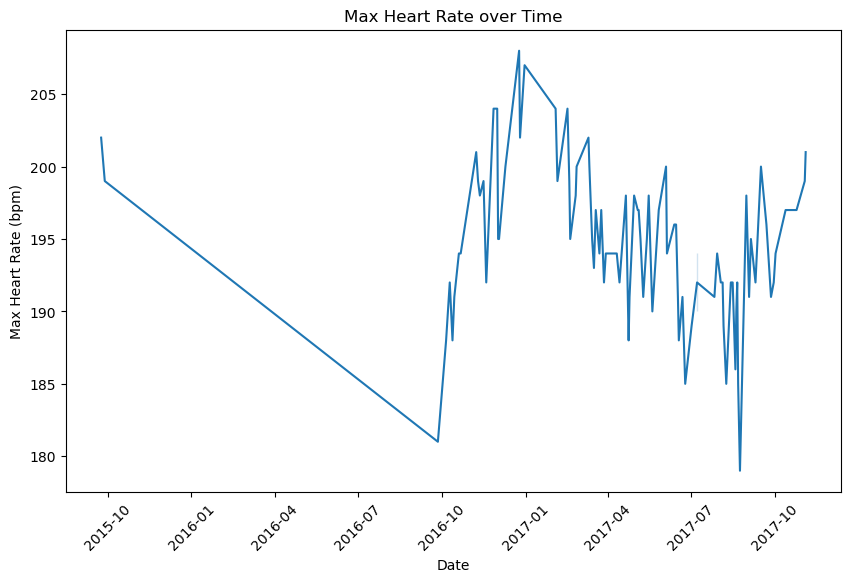

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Max Heart Rate over Time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Begin Date', y='Max. Heart Rate (bpm)', data=running)
plt.title('Max Heart Rate over Time')
plt.xlabel('Date')
plt.ylabel('Max Heart Rate (bpm)')
plt.xticks(rotation=45)
plt.show()


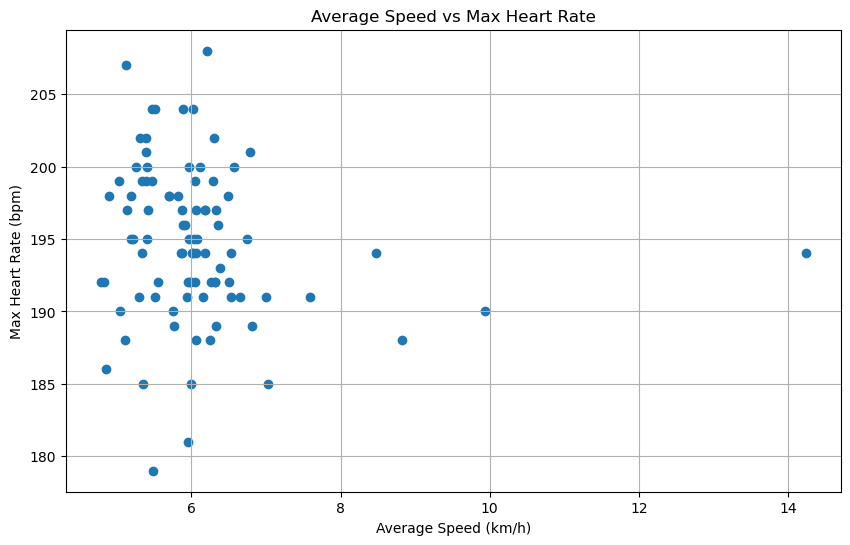

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(running['Average Speed (Raw)'], running['Max. Heart Rate (bpm)'])
plt.xlabel('Average Speed (km/h)')
plt.ylabel('Max Heart Rate (bpm)')
plt.title('Average Speed vs Max Heart Rate')
plt.grid(True)
plt.show()


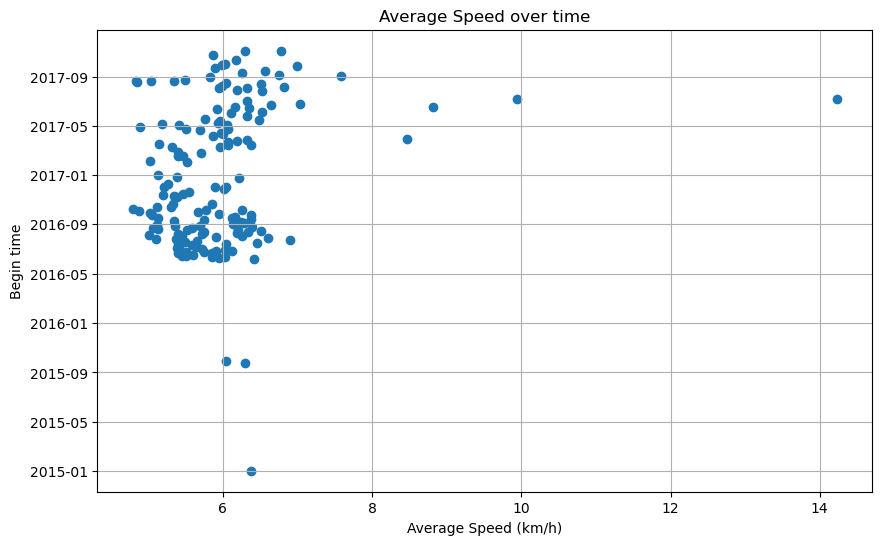

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(running['Average Speed (Raw)'], running['Begin Date'])
plt.xlabel('Average Speed (km/h)')
plt.ylabel('Begin time')
plt.title('Average Speed over time')
plt.grid(True)
plt.show()

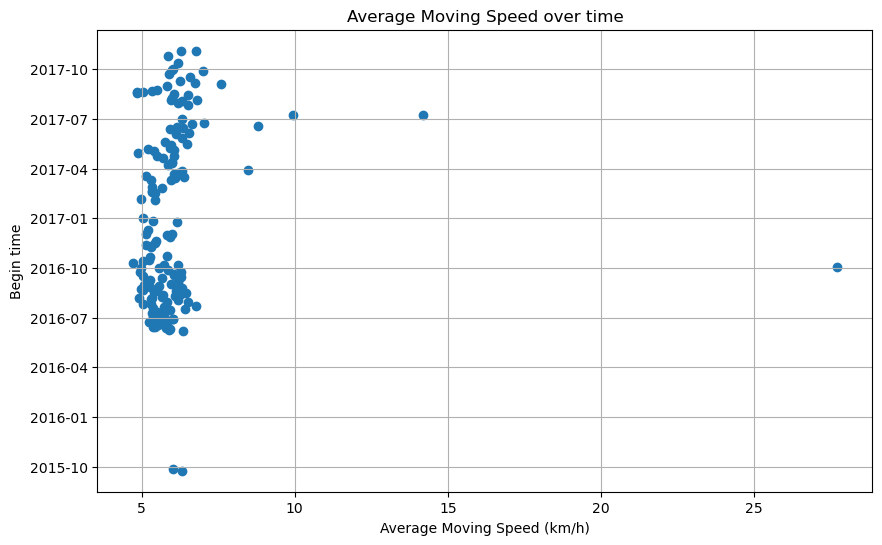

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(running['Average Moving Speed (Raw)'], running['Begin Date'])
plt.xlabel('Average Moving Speed (km/h)')
plt.ylabel('Begin time')
plt.title('Average Moving Speed over time')
plt.grid(True)
plt.show()

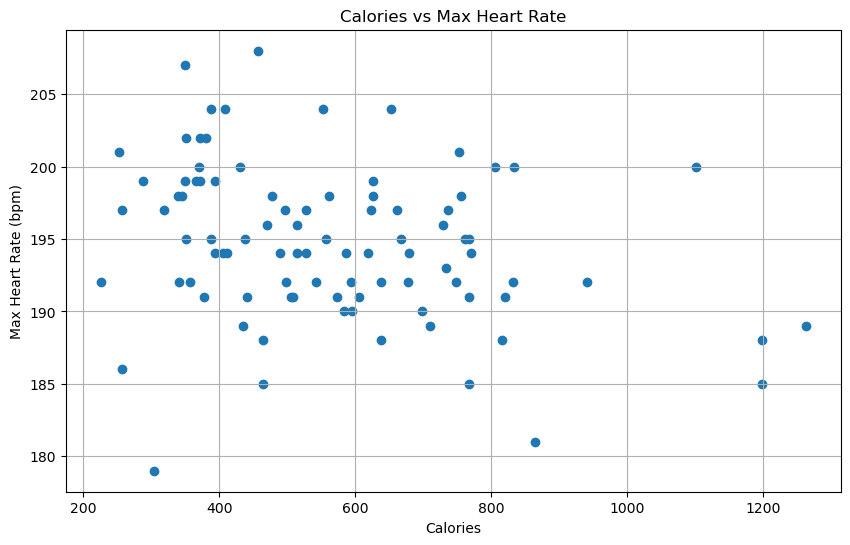

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(running['Calories (Raw)'], running['Max. Heart Rate (bpm)'])
plt.xlabel('Calories')
plt.ylabel('Max Heart Rate (bpm)')
plt.title('Calories vs Max Heart Rate')
plt.grid(True)
plt.show()

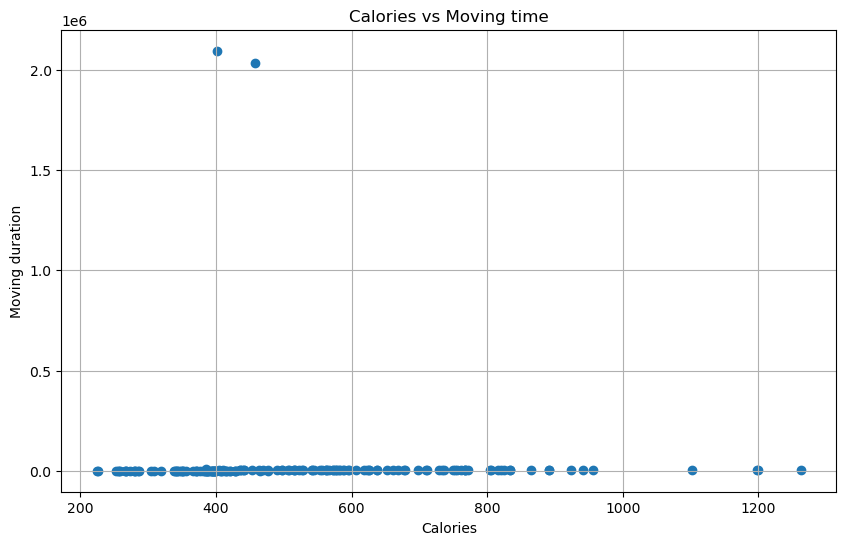

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(running['Calories (Raw)'], running['Moving Duration (Raw Seconds)'])
plt.xlabel('Calories')
plt.ylabel('Moving duration')
plt.title('Calories vs Moving time')
plt.grid(True)
plt.show()

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [24]:
# Select the relevant features and target variable
features = ['Max. Heart Rate (bpm)', 'Average Heart Rate (bpm)', 'Calories (Raw)', 'Average Moving Speed (Raw)', 'Max. Speed (Raw)', 'Temperature (Raw)', 'Elevation Gain (Raw)', 'Wind Speed (Raw)']
target = 'Duration (Raw Seconds)'  # Assuming 'Duration' is in raw seconds

# Prepare the data
X = df[features]
y = df[target]

# Handle any missing values if necessary (e.g., fill with the mean or median)
X.fillna(X.mean(), inplace=True)

C:\Users\himan\AppData\Local\Temp\ipykernel_21484\930166915.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
import numpy as np
import pandas as pd

# Check for infinite values
print(np.isinf(X_train).sum())
print(np.isinf(y_train).sum())

# Check for NaN values
print(np.isnan(X_train).sum())
print(np.isnan(y_train).sum())


Max. Heart Rate (bpm)         0
Average Heart Rate (bpm)      0
Calories (Raw)                0
Average Moving Speed (Raw)    1
Max. Speed (Raw)              0
Temperature (Raw)             0
Elevation Gain (Raw)          0
Wind Speed (Raw)              0
dtype: int64
0
Max. Heart Rate (bpm)         0
Average Heart Rate (bpm)      0
Calories (Raw)                0
Average Moving Speed (Raw)    0
Max. Speed (Raw)              0
Temperature (Raw)             0
Elevation Gain (Raw)          0
Wind Speed (Raw)              0
dtype: int64
0


In [32]:
import numpy as np

# Check for infinite values in X_train
print(np.isinf(X_train).sum())

# Replace infinite values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check if infinite values were replaced
print(np.isinf(X_train).sum())


Max. Heart Rate (bpm)         0
Average Heart Rate (bpm)      0
Calories (Raw)                0
Average Moving Speed (Raw)    1
Max. Speed (Raw)              0
Temperature (Raw)             0
Elevation Gain (Raw)          0
Wind Speed (Raw)              0
dtype: int64
Max. Heart Rate (bpm)         0
Average Heart Rate (bpm)      0
Calories (Raw)                0
Average Moving Speed (Raw)    0
Max. Speed (Raw)              0
Temperature (Raw)             0
Elevation Gain (Raw)          0
Wind Speed (Raw)              0
dtype: int64


In [35]:
# Check for NaN values after replacing infinities
print(X_train.isna().sum())

# Fill NaN values with the column mean or drop them
X_train.fillna(X_train.mean(), inplace=True)



Max. Heart Rate (bpm)         0
Average Heart Rate (bpm)      0
Calories (Raw)                0
Average Moving Speed (Raw)    0
Max. Speed (Raw)              0
Temperature (Raw)             0
Elevation Gain (Raw)          0
Wind Speed (Raw)              0
dtype: int64


C:\Users\himan\AppData\Local\Temp\ipykernel_21484\945311933.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)
